In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE='../data/iris.csv'

In [12]:
irisDF=pd.read_csv(DATA_FILE)
irisDF=irisDF.iloc[:99]
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
irisDF.reset_index(drop=True, inplace=True)

In [14]:
names=irisDF['variety'].unique().tolist()
irisDF['Code']=irisDF.loc[:, 'variety'].replace({name : idx for idx, name in enumerate(names,1) } )
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,Code
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


In [15]:
irisDF.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width,Code
sepal.length,1.000000,-0.204191,0.812907,0.790149,0.728829
sepal.width,-0.204191,1.000000,-0.600651,-0.568620,-0.689199
petal.length,0.812907,-0.600651,1.000000,0.979172,0.969827
petal.width,0.790149,-0.568620,0.979172,1.000000,0.959974
Code,0.728829,-0.689199,0.969827,0.959974,1.000000


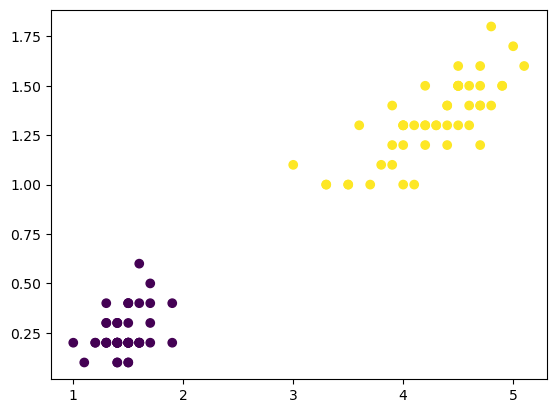

In [16]:
plt.scatter(irisDF['petal.length'],irisDF['petal.width'],c=irisDF['Code'])
plt.show()

In [18]:
features=irisDF[['petal.length','petal.width']]
target=irisDF['Code']

print(f'features => {features.shape}, {features.ndim}D') #2D
print(f'target => {target.shape}, {target.ndim}D') #1D

features => (99, 2), 2D
target => (99,), 1D


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target, 
                                                    random_state=10)

In [21]:
print(f'X_train: {X_train.shape}, {X_train.ndim}D')
print(f'y_train: {y_train.shape}, {y_train.ndim}D')

print(f'X_test: {X_test.shape}, {X_test.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

X_train: (79, 2), 2D
y_train: (79,), 1D
X_test: (20, 2), 2D
y_test: (20,), 1D


In [25]:
y_train.value_counts(), y_train.shape

(Code
 1    40
 2    39
 Name: count, dtype: int64,
 (79,))

In [36]:
y_train.value_counts().loc[1]

40

In [37]:
y_train.value_counts().loc[1]/y_train.shape[0], y_train.value_counts().loc[2]/y_train.shape[0]

(0.5063291139240507, 0.4936708860759494)

In [38]:
y_test.value_counts().loc[1]/y_test.shape[0], y_test.value_counts().loc[2]/y_test.shape[0]

(0.5, 0.5)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model=KNeighborsClassifier()

In [41]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
model.classes_, model.feature_names_in_, model.n_samples_fit_


(array([1, 2], dtype=int64),
 array(['petal.length', 'petal.width'], dtype=object),
 79)

In [43]:
model.score(X_test, y_test)

1.0

In [45]:
prediction = model.predict(X_test)

In [46]:
prediction == y_test

29    True
92    True
57    True
8     True
15    True
9     True
55    True
82    True
36    True
43    True
74    True
49    True
54    True
94    True
28    True
25    True
84    True
97    True
65    True
0     True
Name: Code, dtype: bool